In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Task 1: EDA

## Raw Data

In [ ]:
df = pd.read_csv("../data/raw/raw_MC.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Understanding Data

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No **null values** found in any column!

# Task 2: Analysis Pipeline

## Cleaning Data

In [ ]:
df_cleaned = df.copy().drop(['sex','children','smoker','region'],axis=1)
df_cleaned

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


The columns 'sex', 'children', 'smoker', and 'region' were removed from the dataset because my research question solely focuses on the relationship between age, BMI and the charges of medical insurance. This helps in localising the focus of thhe research question and having onyl the required data to handle.

### Removing outliers

In [ ]:
df_cleaned = df_cleaned[df_cleaned['age'].between(20,40)]
df_cleaned = df_cleaned.sort_values(by='age')
df_cleaned

,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


By removing outliers, I have conslidated my data parallel to my research question, focusing only on the people aged between 20 and 40. The reason for this range of age is because they are usually considered the able-bodied adults who can work in jobs.

In [ ]:
df_cleaned.describe()

,age,bmi,charges
count,564.000000,564.000000,564.000000
mean,29.746454,30.103138,10659.589696
std,6.063422,6.141325,11590.513886
min,20.000000,16.815000,1391.528700
25%,24.750000,25.900000,3558.195763
50%,30.000000,29.767500,5259.488700
75%,35.000000,34.100000,16162.283287
max,40.000000,52.580000,58571.074480


## Visualising Data and Finding Relationships

### BMI and Charges

<AxesSubplot:xlabel='bmi', ylabel='charges'>

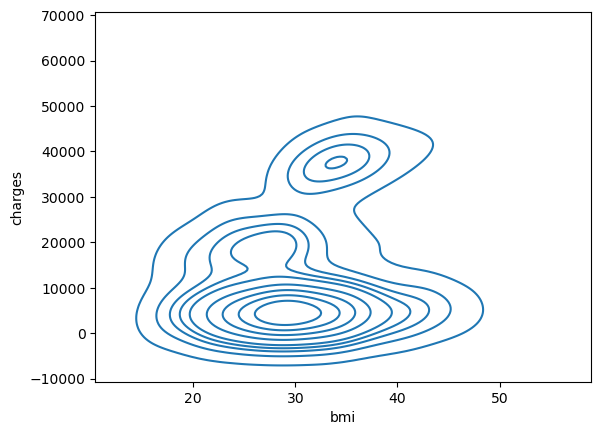

In [ ]:
sns.kdeplot(data=df_cleaned,x='bmi',y='charges')

It can be observed that for BMI in a range of approx. 10-50, the charges range from $0-10000.

However, there is a slight spike at the bmi range 25-30 with the associated charges ranging from $10000-20000.

There is a big spike at the bmi range 30-40 with the associated charges ranging from $30000-40000.

The reason for these spikes in unclear.

### BMI and Age

<AxesSubplot:xlabel='bmi', ylabel='age'>

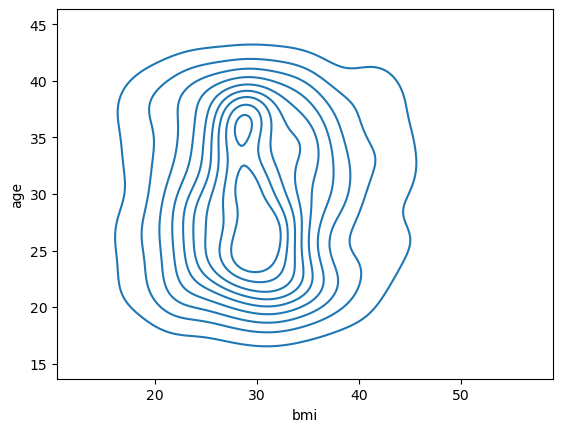

In [ ]:
sns.kdeplot(data=df_cleaned,x='bmi',y='age')

It can be observed that the bmi ranges from 20-45 for the selected people aging from 20-40. This helps in understanding the range of bmi we are working with.

### Age and Charges

<AxesSubplot:xlabel='age', ylabel='charges'>

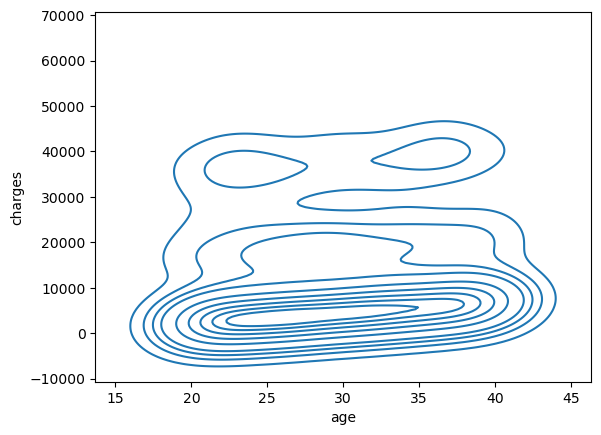

In [ ]:
sns.kdeplot(data=df_cleaned,x='age',y='charges')

It can be observed that for people in the age range of 20-40, the charges range from $0-10000.

However, there is a spike in charges for the age range of 25-35, with the associated charges ranging from $10000-20000.

There is a wide spike for the age range of 20-40 with their associated charges ranging from $10000-20000.

There is another wide spike for the age-range of 20-40 with their associated charges ranging from $30000-40000.

There are smaller isolated spikes for the age ranges of 20-25 and 35-40, with their associated charges ranging from $30000-40000 each.

The reason for these spikes is unclear.

# Task 3: Method Chaining

In [ ]:
import project_functions2 as p2
clean_data = p2.load_and_process("../data/raw/raw_MC.csv")
display(clean_data)

This is the required data that I would like to analyse for my research question.


,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


# Task 4: Research Analysis Conclusion

I started with an interest in understanding the relationship between BMI and the medical insurance costs. However, I quickly realised I needed to add a limiting factor to localilse my data and infer good results. As a result, I then looked at the people aged between 20 and 40 to conduct my analysis. The reason I chose this age range because they are generally considered able adults who can work jobs.

To begin my analysis, I hypothesised three situations:
1) There is a **direct**, i.e. positive, relationship between BMI and charges.
2) There is an **indirect** relationship, i.e. negative, relationship between BMI and charges.
3) There is **no distinguishable** relationship solely between BMI and charges.

Upon conducting my EDA, I noticed that there were some patterns between BMI, age and the medical insurance costs for the designated people. I observed that:

1) The bmi ranged from 20-45 for my selected age group range of 20-40. This observation helped me make better observations further down the analysis procedure.

2) For the BMI range of 20-45, the charges ranged from 0-10000 USD. And for people in the age range of 20-40, the charges ranged from $0-10000. These two observations overlap.

3) There were a couple of excpetions or "spikes" in the graphs, which I observed were interconnected.

    3a) For the BMI range 25-30, the associated charges ranged from 10000-20000 USD. And for the age ranges of 20-40, the associated charges ranged from $10000-20000 each.

    3b) For the BMI range 30-40, the associated charges ranged from 30000-40000 USD. And for the age-range of 20-40, their associated charges ranged from $30000-40000.

Note: The reason for these spikes is unclear.

Therefore, based on my observations, I concluded that:

1) In general, for the BMI range of 20-45 and age range of 20-40, the charges ranged from $0-10000.

2) For reasons inconclusive, the BMI range of 25-30 and age range of 20-40 sees a hike in the associated charges, ranging from $10000-20000.

3) For reasons inconclusive, the BMI range of 30-40 and the age-range of 20-40 sees a hike in the associated charges, ranging from $30000-40000.

Therefore, the overall conclusion to my research question stands that **there is no distinguishable relationship solely between BMI and charges**, with random hikes in charges being observed for all ages. This is possibly because many other factors in the original data, such as children, sex, smoker, and region, contribute to fluctuations in the medical insurance costs from person to person.

In [ ]:
df_cleaned.to_csv("../data/processed/analysis2adata.csv")
#For milestone 4